# Graphs

## What is a graph?

A graph is a representation of a system that contains discrete,
interconnected elements. The elements are represented by nodes|also called
vertices { and the interconnections are represented by edges.

## Path

A path is a sequence of nodes with an edge between each
consecutive pair.

## A directed graph:

In [3]:
!pip install networkx

import networkx as nx

# init graph
G = nx.DiGraph()

In [4]:
# add nodes

G.add_node("Alice")
G.add_node("Bob")
G.add_node("Chuck")

In [7]:
# display nodes

list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [8]:
# add edges

G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

In [9]:
# display edges

list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

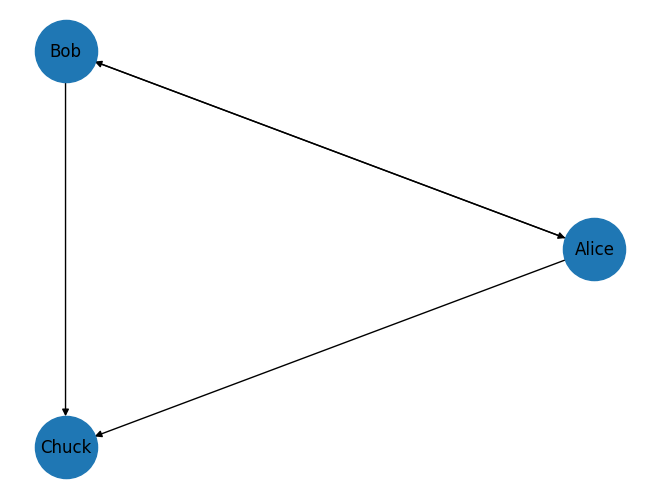

In [12]:
# draw_circular arranges nodes in a circle and connects them with edges

nx.draw_circular(
    G,
    node_color="C0",
    node_size=2000,
    with_labels=True
)

## An undirected graph:

In [13]:
# dictionary mapping city names to longitudes and latitudes

positions = dict(
    Albany=(-74, 43),
    Boston=(-71, 42),
    NYC=(-74, 41),
    Philly=(-75, 40)
)

In [15]:
# init graph
G = nx.Graph()

In [16]:
# add nodes using the dictionary
G.add_nodes_from(positions)

In [17]:
# dictionary of drive times between cities

drive_times = {
    ('Albany', 'Boston'): 3,
    ('Albany', 'NYC'): 4,
    ('Boston', 'NYC'): 4,
    ('NYC', 'Philly'): 2
}

In [18]:
# use dicitonary to add edges
G.add_edges_from(drive_times)

In [ ]:
nx.draw(
    G,
    positions,
    node_color="C1",
    node_shape="s",
    node_size=2500,
    with_labels=
)